In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon

# Parameters for the distributions
shape_param_gamma = 2
scale_param_gamma = 1
rate_param_expon = 1

# Number of simulations
num_simulations = 10000

# Number of samples in each simulation
n = 1000

In [2]:
# Initialize arrays to store the samples
samples_gamma = np.zeros(num_simulations)
samples_expon = np.zeros(num_simulations)

# Perform simulations
for i in range(num_simulations):
    # Generate n random variables from a uniform distribution [0, 1]
    random_uniform = np.random.uniform(0, 1, n)
    
    # Calculate nF(x_2) and n(1 - F(x_n))
    nFx2 = n * np.sort(random_uniform)[1]
    n1MinusFnxn = n * (1 - np.sort(random_uniform)[-1])
    
    # Store the values in the arrays
    samples_gamma[i] = nFx2
    samples_expon[i] = n1MinusFnxn

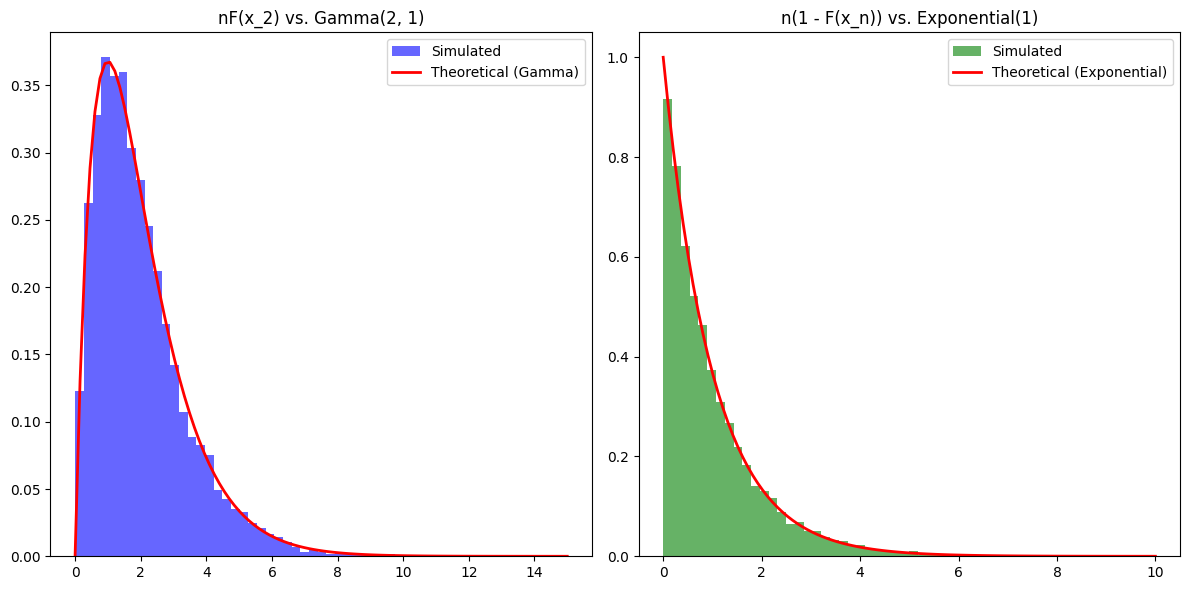

In [3]:
# Plot histograms and compare to theoretical distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(samples_gamma, bins=50, density=True, alpha=0.6, color='b', label='Simulated')
x = np.linspace(0, 15, 100)
plt.plot(x, gamma.pdf(x, shape_param_gamma, loc=0, scale=scale_param_gamma), 'r-', lw=2, label='Theoretical (Gamma)')
plt.title('nF(x_2) vs. Gamma(2, 1)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(samples_expon, bins=50, density=True, alpha=0.6, color='g', label='Simulated')
x = np.linspace(0, 10, 100)
plt.plot(x, expon.pdf(x, scale=1/rate_param_expon), 'r-', lw=2, label='Theoretical (Exponential)')
plt.title('n(1 - F(x_n)) vs. Exponential(1)')
plt.legend()

plt.tight_layout()
plt.show()